In [1]:
# This notebook is based on the tutorial of Mark Jay in Youtube 
# (Part 1 - https://www.youtube.com/watch?v=N3oMKS1AfVI) 
# (Part 2 - https://www.youtube.com/watch?v=lOZGYzTn9Z8) 

#  libraries important for the models

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import adam_v2

#  libraries important for importing the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split    

In [2]:
#import the dataset

train_df = pd.read_csv(r'fashion-mnist_train.csv')
test_df = pd.read_csv(r'fashion-mnist_test.csv')

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#convert the dataframes to numpy arrays for compatibility input

train_data = np.array(train_df, dtype='float32') #when working with tensorflow, every dtype will either be int32 or float32
test_data = np.array(test_df, dtype='float32')

#looking at the dataframe above, the value of the pixels range from 0 to 255 so in order to make the values from 0 to 1 only, we divide everything by 255 as shown below

#slice arrays
x_train = train_data[:, 1:] / 255  #take every single row, slice on the columns from column 1
y_train = train_data[:, 0]   #take every single row, but only take column 0

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

In [4]:
#divide the training data into validation data and actual training data

#returns 4 different arrays
x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train,           # the arrays we want to split up
    test_size = 0.2,            # how much you wanna split the train data into train-validate (test_size = validate size)
    random_state = 12345        # specifies how the stuff will be split into the training and validation data (not sure what the 12345 stands for though)
)

print('x_train shape: {}'.format(x_train.shape))
print('x_validate shape: {}'.format(x_validate.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_validate shape: {}'.format(y_validate.shape))

x_train shape: (48000, 784)
x_validate shape: (12000, 784)
y_train shape: (48000,)
y_validate shape: (12000,)


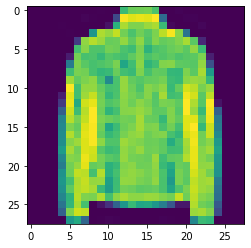

In [5]:
#see visualizations

# take one row from the train data and take all columns
image = x_train[55, :].reshape((28,28))    # this is a row that is 784 long. we need to reshape to the original image shape which is 28 x 28

plt.imshow(image)
plt.show()

Create the CNN 
- Define the model
- Compile the model
- Fit the model

In [7]:
#define the shape of the image

im_rows = 28
im_cols = 28
batch_size = 512                    # 
im_shape = (im_rows, im_cols, 1)    # shape is rows x cols x 1; 1 because it is 2D

#formatting the x_train test validation
x_train = x_train.reshape(x_train.shape[0],*im_shape)
x_test = x_test.reshape(x_test.shape[0],*im_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))


x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [8]:
# DEFINE the model

cnn_model = Sequential([
    #one layer
    Conv2D(
        filters = 32,           # specifies the output dimension of the layer
        kernel_size = 3,        # kernel size 3 by 3
        activation = 'relu',
        input_shape = im_shape
    ),
    MaxPooling2D(               # down sampling the output
        pool_size = 2           # 28 by 28 images will be downsized (height and width) by a factor of 2
    ),
    Dropout(0.2),               # randomly drop out certain connections to the next layer
    Flatten(),                  # flatten all the layers
    Dense(                      
        32,                     # "Filter" units specifies the output dimension of the layer
        activation = 'relu'
    ),          
    Dense(
        10,                     # "Filter" units specifies the output dimension of the layer
        activation ='softmax'   # softmax is preferred activation for an output layer (pls read more about this)
    )
])

In [10]:
# Logging some data to a file using tensorboard

tensorboard = tf.compat.v1.keras.callbacks.TensorBoard(
    log_dir = r'logs/{}'.format('cnn_1layer'),
    write_graph = True,
    write_grads = True,
    histogram_freq = 1,
    write_images = True
)

In [11]:
# Compile the model

cnn_model.compile(
    loss = 'sparse_categorical_crossentropy',           # read more about the loss
    optimizer = 'adam',                                 # lr = learning rate; read about Adam
    metrics = ['accuracy']                              # specify which things we want to minimize/maximize (in this application, maximize accuracy)
)

In [12]:
# FIT the model
print(x_train.shape)
print(x_validate.shape)
cnn_model.fit(
    x_train, y_train, 
    batch_size = batch_size,                            # how many rows of data is used for each step of stochastic gradient descent
    epochs = 10,
    verbose = 1,                                        # Verbose = set to true, Keras will print a log
    validation_data = (x_validate, y_validate),
    callbacks = [tensorboard]
)



(48000, 28, 28, 1)
(12000, 28, 28, 1)
Epoch 1/10
94/94 [==============================] - 23s 221ms/step - loss: 0.7714 - accuracy: 0.7340 - val_loss: 0.5170 - val_accuracy: 0.7980
Epoch 2/10
94/94 [==============================] - 21s 226ms/step - loss: 0.4432 - accuracy: 0.8412 - val_loss: 0.4009 - val_accuracy: 0.8618
Epoch 3/10
94/94 [==============================] - 27s 288ms/step - loss: 0.3852 - accuracy: 0.8656 - val_loss: 0.3618 - val_accuracy: 0.8751
Epoch 4/10
94/94 [==============================] - 31s 327ms/step - loss: 0.3531 - accuracy: 0.8758 - val_loss: 0.3392 - val_accuracy: 0.8814
Epoch 5/10
94/94 [==============================] - 25s 265ms/step - loss: 0.3334 - accuracy: 0.8825 - val_loss: 0.3166 - val_accuracy: 0.8888
Epoch 6/10
94/94 [==============================] - 21s 222ms/step - loss: 0.3193 - accuracy: 0.8877 - val_loss: 0.3162 - val_accuracy: 0.8860
Epoch 7/10
94/94 [==============================] - 27s 287ms/step - loss: 0.3067 - accuracy: 0.8901 - v

In [ ]:
score = cnn_model.evaluate(x_test, y_test, verbose = 0)

print('test loss: {:.4f}'.format(score[0]))
print('test acc: {:.4f}'.format(score[1]))